## 1. Loading URANOS Simulation Data

URANOS generates several files which may be of interest depending on the analysis you wish to perform, but if you care about where neutrons hitting your detector may be coming from, the `detectorNeutronHitData.dat` should be the first port of call. If "Write Detector Neutron Hits to File" has been enabled, each of your output folders should have this.

The URANOS python library contains some nice helper functions that will automatically read the hits from these files so first lets open an example simulation file from a homogenous simulation of relatively dry soil (5%) soil moisture.

This Jupyter notebook tutorial has been developed from a very nice example put together by Martin Schroen at https://github.com/mkoehli/uranos/tree/main/analysis.

In [1]:
import os
print("Example_SM5")
for filename in os.listdir("Example_SM5/"):
    print("-->",filename)

Example_SM5
--> detectorOrigins20220718-0136_N10000000.csv
--> densityMapSelected_20220718-0136_N10000000.csv
--> run_uranos_nogui_windows.bat
--> uranosRawHistos_20220718-0136_N10000000.root
--> run_uranos_gui_windows.bat
--> NeutronDistances_20220718-0136_N10000000.png
--> run_uranos_nogui_linux.sh
--> UranosGeometryConfig.dat
--> Uranos_20220718-0136_N10000000.cfg
--> densityMapSelectedEnergy_20220718-0136_N10000000.png
--> AlbedoNeutronDetectorDistances_20220718-0136_N10000000.csv
--> run_uranos_gui_linux.sh
--> densityTrackMapSelectedEnergy_20220718-0136_N10000000.png
--> detectorNeutronHitData.dat
--> detectorOriginsMap_20220718-0136_N10000000.png
--> Uranos.cfg
--> AlbedoNeutronLayerDistances_20220718-0136_N10000000.csv


In [2]:
from lib.uranos import URANOS

simulation_humidity  = 1.0 # humidity in g/m3
simulation_pixelsize = 2.0 # pixel size in m

# Create a URANOS reader object and pass the sims folder 
Uraw = URANOS(folder='Example_SM5/', 
           scaling=simulation_pixelsize, 
           hum=simulation_humidity)

# Tell URANOS to read our hits file automatically.
Uraw.read_hits()

Read hits creates an internal dataframe that contains every neutron registered in the detector during the simulatin alongside some helpful headers we can use to make simple plots. 

We can view the first 10 simulated events using the command below.

In [3]:
Uraw.Hits.head(10)

Detector ID  Neutron number  Number of scatterings  previous x [m]  \
0            0            6225                     59         8.99011   
1            0            6887                     10        22.42850   
2            0            8749                      0         2.31550   
3            0            9058                     70         6.92731   
4            0            9182                      3        -5.86323   
5            0            9402                     44         5.33479   
6            0           13839                      0       -12.98940   
7            0           13839                      7        -1.04752   
8            0           17834                      3         7.33854   
9            0           24871                     32        -8.70505   

   previous y [m]  previous depth [m]  Nadir angle  Azimuth angle  \
0      -19.138900           -7.120040     1.327810       1.817090   
1       64.092500            0.000240     1.658590       4.412130   
2      -23.767200            0.107123     0.314497       1.522980   
3      -13.076200           -5.870880     1.479740       2.169520   
4       10.511400          -16.444600     0.916285       5.093140   
5       -5.201480           -6.658970     1.091310       1.913610   
6      -38.110800            0.245699     0.511588       1.272560   
7        0.622729            0.004962     2.792980       0.387470   
8       -6.633160           -2.279610     2.176470       2.292540   
9      -12.197500            0.005807     1.966350       0.721901   

   Energy [MeV]  Energy at interface [MeV]  ...           r        ex  \
0  8.896830e-07                   0.661250  ...   50.435774   8.99011   
1  1.088220e+00                   3.753140  ...  407.747391  22.42850   
2  5.087690e+02                 508.769000  ...   23.879726   2.31550   
3  9.632980e-07                   1.263920  ...  293.331748   6.92731   
4  9.807170e-01                   1.525040  ...   81.925763  -5.86323   
5  4.229860e-07                   0.000320  ...   24.710151   5.33479   
6  2.034670e+00                   2.034670  ...   40.263601 -12.98940   
7  1.295420e-01                   1.968160  ...    1.231240  -1.04752   
8  3.163270e+00                   3.729260  ...  152.419995   7.33854   
9  3.001520e-03                   0.447886  ...   16.444198  -8.70505   

          ey        we      we_deg  thermal             E          eE      n  \
0 -19.138900  2.009343  115.148605    False  8.896830e-07    0.661250   6225   
1  64.092500  4.375175  250.726382    False  1.088220e+00    3.753140   6887   
2 -23.767200  1.667321   95.548502    False  5.087690e+02  508.769000   8749   
3 -13.076200  2.057379  117.901352    False  9.632980e-07    1.263920   9058   
4  10.511400  5.220606  299.175140    False  9.807170e-01    1.525040   9182   
5  -5.201480  2.368254  135.716541     True  4.229860e-07    0.000320   9402   
6 -38.110800  1.241719   71.158688    False  2.034670e+00    2.034670  13839   
7   0.622729  5.746242  329.297556    False  1.295420e-01    1.968160  13839   
8  -6.633160  2.406045  137.882255    False  3.163270e+00    3.729260  17834   
9 -12.197500  0.950359   54.461819    False  3.001520e-03    0.447886  24871   

   sc  
0   1  
1   1  
2   0  
3   1  
4   0  
5   1  
6   0  
7   1  
8   0  
9   1  

[10 rows x 64 columns]

Read hits also creates some useful short-hand columns for variables of interest, aswell as some standardized labels (e.g. all lower case, spaces removed) to help processing on different operating systems. 

Some of the most used short-hand columns for certain variables are:
- `x` - equals 'x_at_interface_[m]' (first soil contact)
- `y` - equals 'y_at_Interface_[m]' (first soil contact)
- `z` - equals 'z_at_Interface_[m]' (first soil contact)
- `z_max` - equals 'maximum_Depth_[m]'
- `w` - angle of origin: `np.arctan2(y, x) + 3.141`
- `w_deg` - w in degrees
- `r` -  Distance to origin: `np.sqrt(x**2 + y**2)`
- `ex` - equals 'previous_x_[m]' (last position before detection)
- `ey` - equals 'previous_y_[m]' (last position before detection)
- `we` - angle of entry
- `we_deg` - we in degrees
- `E` - equals 'Energy_[MeV]'
- `thermal` - thermal neutron flag, `E < 0.5e-6`

The full list of keys, including standardised duplicates, uncomment the code below.

In [4]:
#for key in Uraw.Hits:
#    print(key)

## 2. Plotting Neutron Hit Data

Now that we have a nice URANOS Hits dataframe, we can start making some plots. 

First lets try and simply plot the `x` and `z` position of the neutrons reaching the detector volume at their first interface. The default simulation configuration treats downward going as positive `z`, so remember to flip the axes.

In [5]:
from matplotlib import pyplot as plt

# Make a simple plot of Hit x and z
plt.scatter( Uraw.Hits.x, -Uraw.Hits.z, s=2 )
plt.xlabel("X [m]")
plt.ylabel("Z [m]")
plt.show()

Already you can see there is a problem here, most of our positions at the first interface are above the detector. This is because we're also including neutrons that are recorded passing through our large detector volume but haven't yet reached the soil.

Lets use one of the URANOS python libraries handy built in functions to fix that and try again.


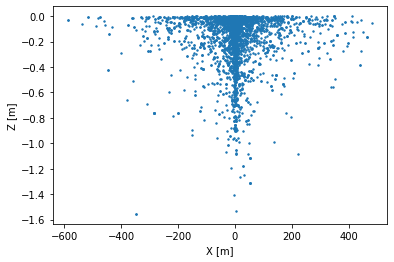

In [6]:
# Remove hits that haven't interacted with the soil
Usc = Uraw.only_soil_contact()

# Make a simple plot of x and z
plt.scatter( Usc.Hits.x, -Usc.Hits.z, s=2 )
plt.xlabel("X [m]")
plt.ylabel("Z [m]")
plt.show()

Thats a bit better... 

Now, if we look at the ID's of each neutron detected (`neutron_number`), we can see that some are registered more than once because the simulations were ran with the `Transparent` setting enabled in the detector page.

In [7]:
# Print cutns per neutron number
nhits = Usc.Hits.groupby(['neutron_number']).size().reset_index(name='count')
nhits.tail(10)

neutron_number  count
2870         9985418      1
2871         9987429      1
2872         9989649      2
2873         9993060      2
2874         9993655      1
2875         9994420      1
2876         9994645      1
2877         9994690      2
2878         9997581      1
2879         9997761      1

Instead of having to rerun the simulations again, we can use another handy URANOS function `drop_multicounts` to remove these.

In [8]:
# Run URANOS filter
U = Usc.drop_multicounts()

# Print counts again
nhits = U.Hits.groupby(['neutron_number']).size().reset_index(name='count')
nhits.tail(10)

neutron_number  count
2870         9985418      1
2871         9987429      1
2872         9989649      1
2873         9993060      1
2874         9993655      1
2875         9994420      1
2876         9994645      1
2877         9994690      1
2878         9997581      1
2879         9997761      1

Finally we need to account for a the actual energy response of our detectors as right now we are assuming we have 100% detector efficiency across the full energy range of neutrons we are seeing.

If we plot the energy of the neutrons as they arrive we can see it extends over a large range.

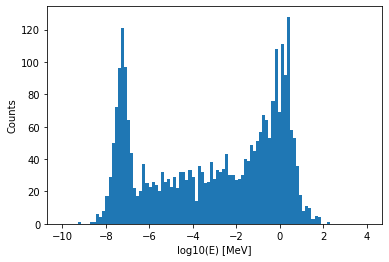

In [9]:
import numpy as np

# Make a log plot of neutron energies
plt.hist( np.log10(U.Hits.E), bins=np.linspace(-10,4,100) )
plt.xlabel("log10(E) [MeV]")
plt.ylabel("Counts")
plt.show()

Thankfully URANOS has a nice weighting function that can be used to automatically calculate a weight factor as a functino of energy for each neutron. In the example below we apply a `1/sqrt(E)` weighting, assuming we are using an unmoderated thermal neutron detector such as a He-3 tube.

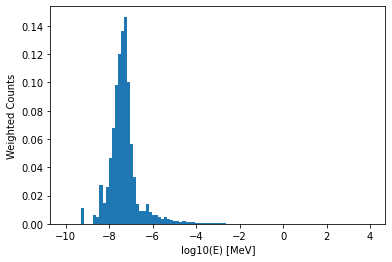

In [10]:
# Apply an energy waiting function
U = U.weight_by_detector_response(method='1/sqrt(E)')

# Make a weighted log plot of neutron energies
plt.hist( np.log10(U.Hits.E), weights=U.Hits.Weight, bins=np.linspace(-10,4,100) )
plt.xlabel("log10(E) [MeV]")
plt.ylabel("Weighted Counts")
plt.show()

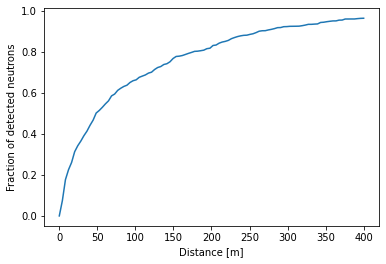

In [11]:
cutvalues = np.linspace(0,400,100)
thermalvalues = []

for cut in cutvalues:
    
    rcut = U.Hits[U.Hits.r < cut]
    thermalvalues.append( rcut.Weight.sum() )
    
plt.plot( cutvalues, thermalvalues) 
plt.xlabel("Distance [m]")
plt.ylabel("Fraction of detected neutrons")
plt.show()

<AxesSubplot:xlabel='x (in m)', ylabel='y (in m)'>

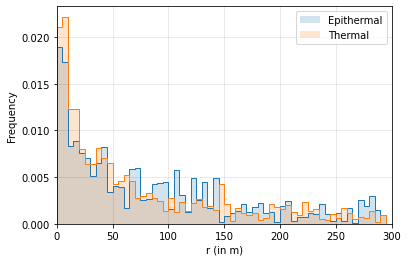

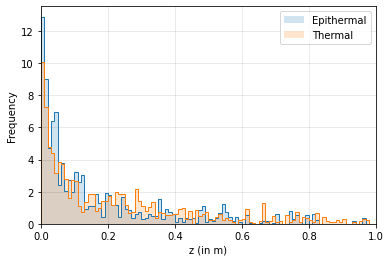

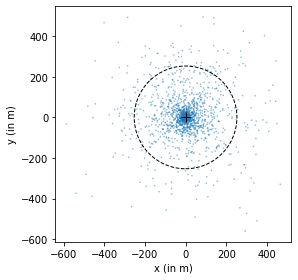

In [12]:
U.distance_distribution(var='r')

U.depth_distribution(var='z')

U.plot_xy_hits()

## 3. Making Neutron Hit Comparisons

Okay, now that we know how to load in neutron hit data we can make some quick comparisons loading in two different datasets all at once.

Lets import URANOS again incase we want to just skip to here next time.

In [13]:
from lib.uranos import URANOS

simulation_humidity  = 1.0 # humidity in g/m3
simulation_pixelsize = 2.0 # pixel size in m

# Create a URANOS reader object and pass the sims folder for SM5
U5  = URANOS(folder='Example_SM5/', 
             scaling=simulation_pixelsize, 
             hum=simulation_humidity)
U5 = U5.read_hits().only_soil_contact().drop_multicounts().weight_by_detector_response(method='1/sqrt(E)')

# Create a URANOS reader object and pass the sims folder for SM5
U25  = URANOS(folder='Example_SM25/', 
             scaling=simulation_pixelsize, 
             hum=simulation_humidity)
U25 = U25.read_hits().only_soil_contact().drop_multicounts().weight_by_detector_response(method='1/sqrt(E)')

# Create a URANOS reader object and pass the sims folder for SM40
U45 = URANOS(folder='Example_SM45/', 
             scaling=simulation_pixelsize, 
             hum=simulation_humidity)
U45 = U45.read_hits().only_soil_contact().drop_multicounts().weight_by_detector_response(method='1/sqrt(E)')

Now it becomes very easy for us to make comparisons.

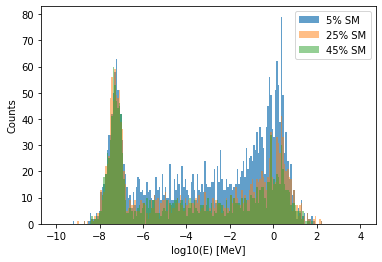

In [16]:
# Plot the energy spectrum at each simulated detector before weighting.
plt.hist( np.log10(U5.Hits.E), bins=np.linspace(-10,4,200), alpha=0.7, label="5% SM" )
plt.hist( np.log10(U25.Hits.E), bins=np.linspace(-10,4,200), alpha=0.5, label="25% SM" )
plt.hist( np.log10(U45.Hits.E), bins=np.linspace(-10,4,200), alpha=0.5, label="45% SM" )
plt.xlabel("log10(E) [MeV]")
plt.ylabel("Counts")
plt.legend()
plt.show()

The URANOS library also has several built in distributions we can run with.

<AxesSubplot:xlabel='z (in m)', ylabel='Frequency'>

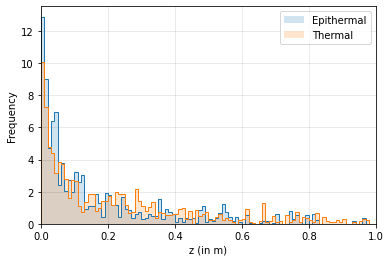

In [19]:
U45.depth_distribution(var='z')
U25.depth_distribution(var='z')
U5.depth_distribution(var='z')

## 3. Making Neutron Hit Overlays

We can also use the other datasets URANOS outputs to compare different simulations and understand the relative contributions different areas may have to our neutron counts in complex geometries.

Lets try loading the Road example simulation and look at how a large "parking" area with low soil moisture affects our counts. In this extreme simulation there is a very large area of dry soil (5%) which extends down to a depth of 3m deep on the right hand side of the site (X>0). On the other side is an extremely wet area.

In [18]:
from lib.uranos import URANOS

simulation_humidity  = 1.0 # humidity in g/m3
simulation_pixelsize = 2.0 # pixel size in m

# Create a URANOS reader object and pass the sims folder for the Road Example
UR  = URANOS(folder='Example_Edge/', 
             scaling=simulation_pixelsize, 
             hum=simulation_humidity)
UR = UR.read_hits().only_soil_contact().drop_multicounts().weight_by_detector_response(method='1/sqrt(E)')

URANOS has some tools to load the PNG directly into an array for us.

In [19]:
UR = UR.read_materials('6.png').material2sm(SM_gui=0.2)

plt.imshow(UR.SM, extent=[-500,500,-500,500], aspect='auto')

plt.xlabel("X [m]")
plt.ylabel("Y [m]")
cbar = plt.colorbar()
cbar.set_label("Fraction SM")

plt.show()

Imported map `.Materials` (500 x 500), center at (249.5, 249.5).
  One pixel in the data equals 2 meters in reality (1000 x 1000)
  Material codes: 10, 139
  Guessing default material: 139
Generated soil moisture map `.SM`, values: 0.05, 0.695
Nearby avg. sm is 0.15 +/- 0.24.


Plotting the XZ distribution its clear it has shifted relative to our other simulations.

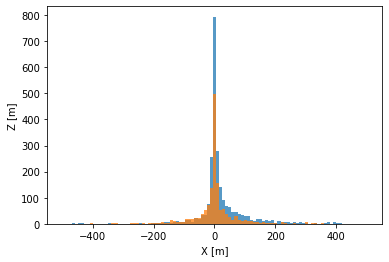

In [20]:
# Make X histogram of all neutron hits in UR and U40
plt.hist(UR.Hits.x, bins=np.linspace(-500,500,100),  alpha=0.75, label="Strip Sim")
plt.hist(U40.Hits.x, bins=np.linspace(-500,500,100), alpha=0.75, label="40% SM Sim")
plt.xlabel("X [m]")
plt.ylabel("Z [m]")
plt.show()

Lets find the regions of interest using the URANOS library tools.

In [21]:
UR = UR.generate_distance().find_regions()
UR.region_data

Generated distance map `.Distance`, reaching up to 705.7 meters.
Found 1 regions, mapped to `.Regions`, DataFrame generated as `.region_data`.


Materials center_mass center_geom   area     SM Distance_min Distance_com  \
id                                                                             
0      139.0  [120, 250]  [120, 250]  0.482  0.695    19.026298    259.00193   
1       10.0  [370, 250]  [370, 250]  0.518   0.05     1.414214   241.002075   

   Weights Neutrons Contributions Origins Density  Regions  
id                                                          
0      NaN      NaN           NaN     NaN     NaN        0  
1      NaN      NaN           NaN     NaN     NaN        1

As you can see we have two clear regions of interest. We can plot these using the handy URANOS plot function.

The URANOS-specifc plotting routine is very handy to quickly make plots of the generated matrices. They can be used as soon as regions have been identified, as the arguments for annotation and contours refer to the corresponding entries in the `region_data` DataFrame.

The function `U.plot(ax, image, annotate, overlay, ...) -> ax` has the following options:
- `ax=None` - uses a given axes from an overarching figure panel, or creates a new axis and figure
- `image='SM'` - name of the matrix used for colored plotting
- `annotate=None` - attempts to annotate regions with a label given by a column name in U.region_data
- `overlay=None` - overlay 'Origins' to draw crosses of neutron origins onto the map
- `fontsize=10, title=None` - additional formatting
- `contour=False` - if True, draw the region borders on the map
- `regions=None` - list of regions to plot, e.g., `[0,4,5]`, defaults to all regions.
- `extent=500` - zoom in to a certain width/height square (500 is the whole matrix)
- `cmap='Greys'` - colorscale used for the image plot
- `cmap_scale=2` - scales the colorscale by factor 2, which is often lighter and increases readability for annotation labels.
- `x_marker=None` - x-distance in meters to draw a marker on top of the axis, e.g., to highlight a distance of a patch from the center
- `cross_alpha=0.5` - transparency of the central cross at (0,0). Set to 0 to remove it,
- `label_offset=(0,0)` - x and y offset of the labels to increase readibility over region contours
- `step_fraction=0.2` - x and y steps to use for tickmarks relative to the full extent.
- `colorbar=False` - draw a colorbar
- `axis_labels=True` - draw x and y axis labels: 'x (in m)'
- `interpolation='none'` - interpolation of the image, can be one of 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'

Notes:
- The plotted dimensiones are always given in meters.
- The routine returns an `ax` object which can be used to make further changes to the plot. 
- If you need to save the plot, use: `ax.figure.savefig('my_plot.pdf', bbox_inches="tight")`

<AxesSubplot:title={'center':'Map of Regions (id)'}, xlabel='x (in m)', ylabel='y (in m)'>

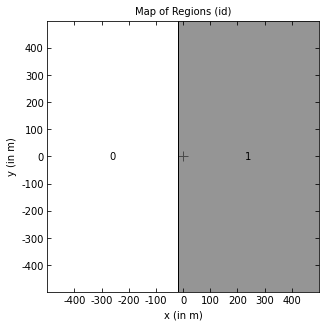

In [22]:
# Plot regions labelled by index
UR.plot(image='Regions', annotate='Regions', contour=True)

<AxesSubplot:title={'center':'Map of Material code'}, xlabel='x (in m)', ylabel='y (in m)'>

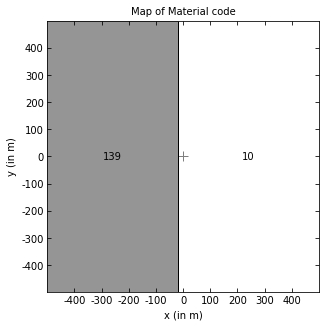

In [23]:
# Plot regions labelled by URANOS material code
UR.plot(image='Materials', annotate='Materials', contour=True)

In [24]:
# Label regions
UR.region_data['freetext'] = [r'Wet', r'Dry']

# Plot regions labelled by index
UR.plot(image='Regions', annotate='freetext', contour=True)

<AxesSubplot:title={'center':'Map of Regions (id)\nAnnotation: Materials'}, xlabel='x (in m)', ylabel='y (in m)'>

Now lets make a map estimating the relative density of neutrons coming from each region.

In [25]:
UR = UR.read_density('densityMapSelected*', pad=True)

UR.plot(image='Density', annotate='Density', contour=True,
       cmap='Spectral_r', cmap_scale=1, colorbar=True, interpolation='bicubic')

  Reading Example_Edge/densityMapSelected_20220717-2324_N10000000.csv
Imported URANOS density map as `.Density` (500 x 500).


<AxesSubplot:title={'center':'Map of sim. Neutron Density (a.u.)'}, xlabel='x (in m)', ylabel='y (in m)'>

We can see that the region on the left of our plot results in approximately 50% less neutrons than the right. Looking at the soill moisture maps below this is not really a suprise.

<AxesSubplot:title={'center':'Map of Soil Moisture (vol.%)'}, xlabel='x (in m)', ylabel='y (in m)'>

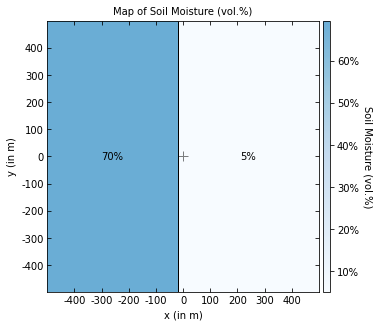

In [26]:
UR.plot(image='SM', annotate='SM', contour=True,
        cmap='Blues', colorbar=True)

Finally we can use the `detectorOrigins` map that URANOS outputs to also estimate how much of that neutron flux coming back from each region actuallly makes it to our detector in the centre of the simulated site.

When we do this its clear that the region on the left contributions even less to the overall count. 

In [27]:
UR = UR.read_origins('detectorOrigins*', pad=True)
ax = UR.plot(image='SM', cmap='Blues', annotate='Origins', overlay='Origins',
            contour=True, colorbar=True)



  Reading Example_Edge/detectorOrigins20220717-2324_N10000000.csv
Imported URANOS origins as `.Origins` (500 x 500).


## More Sir

The URANOS python toolkit makes it very easy to understand the effect different local features will have on a detectors true field of view. Below overlays of the detector origins are generated for three possible simulation geometries in a standardised way.

Imported map `.Materials` (500 x 500), center at (249.5, 249.5).
  One pixel in the data equals 2 meters in reality (1000 x 1000)
  Material codes: 10, 40
  Guessing default material: 40
Generated soil moisture map `.SM`, values: 0.05, 0.2
Nearby avg. sm is 0.16 +/- 0.06.
Generated distance map `.Distance`, reaching up to 705.7 meters.
Found 1 regions, mapped to `.Regions`, DataFrame generated as `.region_data`.
  Reading Example_Strip/densityMapSelected_20220717-1956_N10000000.csv
Imported URANOS density map as `.Density` (500 x 500).
  Reading Example_Strip/detectorOrigins20220717-1956_N10000000.csv
Imported URANOS origins as `.Origins` (500 x 500).
Imported map `.Materials` (500 x 500), center at (249.5, 249.5).
  One pixel in the data equals 2 meters in reality (1000 x 1000)
  Material codes: 10, 139
  Guessing default material: 139
Generated soil moisture map `.SM`, values: 0.05, 0.695
Nearby avg. sm is 0.15 +/- 0.24.
Generated distance map `.Distance`, reaching up to 705.7 meters

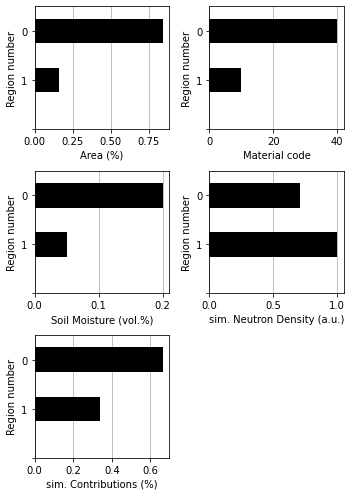

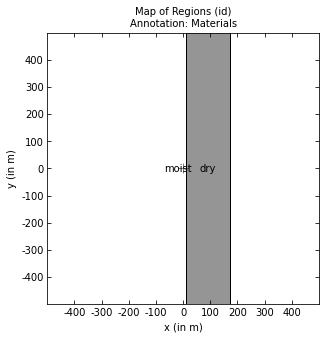

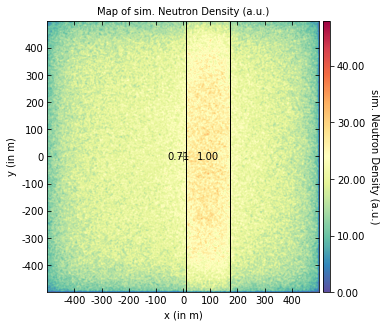

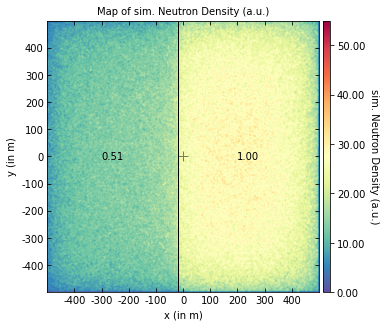

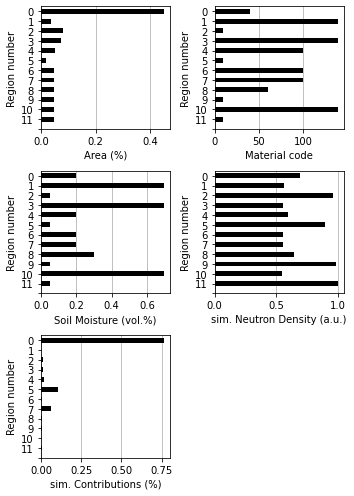

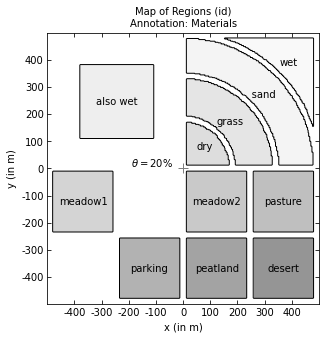

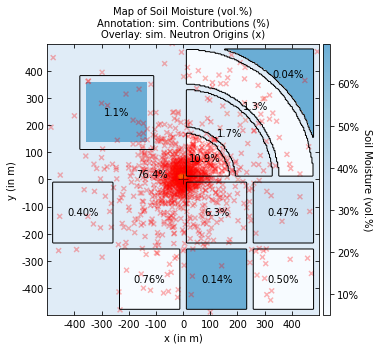

In [28]:
# Read

# Plot the strip case
UR = URANOS(folder='Example_Strip/', scaling=2, hum=5)

UR = UR.read_materials('6.png').material2sm(SM_gui=0.2)
UR = UR.generate_distance().find_regions()
UR = UR.read_density('densityMapSelected*', pad=True)
UR = UR.read_origins('detectorOrigins*', pad=True)

UR.region_data['freetext'] = [r'moist', r'dry']

UR.histogram(var=['area', 'Materials', 'SM', 'Density', 'Origins'])
UR.plot(image='Regions', annotate='freetext', contour=True)
UR.plot(image='Density', annotate='Density', contour=True,
       cmap='Spectral_r', cmap_scale=1, colorbar=True, interpolation='bicubic')
ax = UR.plot(image='SM', cmap='Blues', annotate='Origins', overlay='Origins',
            contour=True, colorbar=True)
ax.figure.savefig('strip_plot.pdf', bbox_inches="tight")

# Plot the Edge Case
UE = URANOS(folder='Example_Edge/', scaling=2, hum=5)
UE = UE.read_materials('6.png').material2sm(SM_gui=0.2)
UE = UE.generate_distance().find_regions()
UE = UE.read_density('densityMapSelected*', pad=True)
UE = UE.read_origins('detectorOrigins*', pad=True)

UE.region_data['freetext'] = [r'moist', r'dry']

UE.histogram(var=['area', 'Materials', 'SM', 'Density', 'Origins'])
UE.plot(image='Regions', annotate='freetext', contour=True)
UE.plot(image='Density', annotate='Density', contour=True,
       cmap='Spectral_r', cmap_scale=1, colorbar=True, interpolation='bicubic')
ax = UE.plot(image='SM', cmap='Blues', annotate='Origins', overlay='Origins',
            contour=True, colorbar=True)
ax.figure.savefig('edge_plot.pdf', bbox_inches="tight")

# Plot Martin's Complex Field Case
UC = URANOS(folder='Example_ComplexField/', scaling=2, hum=5)
UC = UC.read_materials('6.png').material2sm(SM_gui=0.2)
UC = UC.generate_distance().find_regions()
UC = UC.read_density('densityMapSelected*', pad=True)
UC = UC.read_origins('detectorOrigins*', pad=True)

UC.region_data['freetext'] = [r'$\theta=20\%$', r'wet', '     sand',
                             'also wet', 'grass','dry', 'meadow1', 'meadow2',
                             'pasture', 'parking', 'peatland','desert']
UC.histogram(var=['area', 'Materials', 'SM', 'Density', 'Origins'])
UC.plot(image='Regions', annotate='freetext', contour=True)
UC.plot(image='Density', annotate='Density', contour=True,
       cmap='Spectral_r', cmap_scale=1, colorbar=True, interpolation='bicubic')
ax = UC.plot(image='SM', cmap='Blues', annotate='Origins', overlay='Origins',
            contour=True, colorbar=True)
ax.figure.savefig('complex_plot.pdf', bbox_inches="tight")